# All my analysis is based on the assumption that the data has been cleaned and are accurate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [2]:
hospital_readmission = pd.read_csv("hospital-readmission.csv")
entity_data = pd.read_csv("entity_data.csv")

# Data preparation

In [3]:
hospital_readmission.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted,ic9Groupname3,ic9Groupname2,physician_speciality,ic9Groupname
0,Caucasian,Female,10-20,1,1,7,3,59,0,18,...,9,None,Up,Ch,Yes,0,Neoplasms,Diabeties,Unknown,Neoplasms
1,Caucasian,Male,30-40,1,1,7,2,44,1,16,...,7,None,Up,Ch,Yes,0,Circulatory,Diabeties,Unknown,Circulatory
2,Caucasian,Female,80-90,2,1,4,13,68,2,28,...,8,None,Steady,Ch,Yes,0,Other,Circulatory,Unknown,Circulatory
3,AfricanAmerican,Female,40-50,1,1,7,9,47,2,17,...,9,None,Steady,No,Yes,0,Injury,Circulatory,Unknown,Diabeties
4,Caucasian,Female,40-50,1,3,7,7,60,0,15,...,8,None,Down,Ch,Yes,1,Diabeties,Diabeties,Family Practice,Circulatory


In [4]:
hospital_readmission["race"] = hospital_readmission["race"].fillna("other")

In [5]:
ic9_cols = ["ic9Groupname", "ic9Groupname2","ic9Groupname3",]

# Get unique values from ["ic9Groupname", "ic9Groupname2","ic9Groupname3",]
ic9Groupname_values = list(pd.unique(hospital_readmission[ic9_cols].values.ravel('K')))

# Create ID for  ["ic9Groupname", "ic9Groupname2","ic9Groupname3",]
for i in range(len(ic9Groupname_values)):
    hospital_readmission = hospital_readmission.apply(pd.Series.replace, to_replace=ic9Groupname_values[i], value=int(i))
    
# Change column type to category
for col in ic9_cols:
    hospital_readmission[col] = hospital_readmission[col].astype('category')

# Data Analysis

### 1. What percentage of Asian Male are readmitted?

In [6]:
percentReadmitAsianMale = hospital_readmission[
    (hospital_readmission["race"] == "Asian") & 
    (hospital_readmission["readmitted"] == 1) &
    (hospital_readmission["gender"] == "Male")
].shape[0] / hospital_readmission.shape[0]

print("Percentage of Asian Male are readmitted {}%".format(percentReadmitAsianMale*100))

Percentage of Asian Male are readmitted 0.13793248678585718%


### 2. Show percentage of people readmitted by race and gender

In [7]:
def calc_readmit_percent(col_name):
    values = list(hospital_readmission[col_name].unique())
    percentReadmit = []

    for value in values:
        hr_col = hospital_readmission[hospital_readmission[col_name] == value]
        total_num = hr_col.shape[0]
        num_readmit = hr_col[hr_col["readmitted"] == 1].shape[0]
        percentReadmit.append(num_readmit/total_num*100)
    
    return (values, percentReadmit)

Text(0, 0.5, 'percent of readmitted')

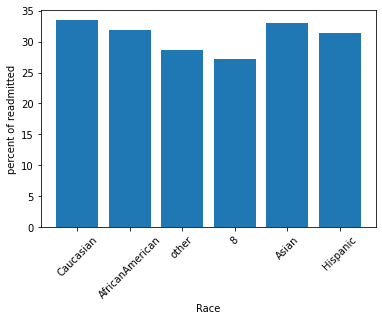

In [8]:
hospital_readmission["race"] = hospital_readmission["race"].astype("str")
race_result = calc_readmit_percent("race")
plt.bar(race_result[0], race_result[1])
plt.xticks(rotation = 45)
plt.xlabel("Race")
plt.ylabel("percent of readmitted")

Text(0, 0.5, 'percent of readmitted')

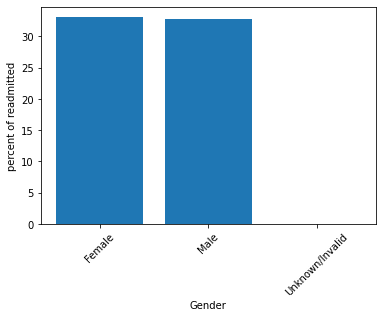

In [9]:
gender_result = calc_readmit_percent("gender")
plt.bar(gender_result[0], gender_result[1])
plt.xticks(rotation = 45)
plt.xlabel("Gender")
plt.ylabel("percent of readmitted")

### 3. Show percentage of people readmitted by age

Text(0, 0.5, 'percent of readmitted')

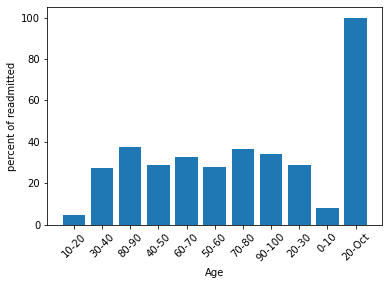

In [10]:
age_result = calc_readmit_percent("age")
plt.bar(age_result[0], age_result[1])
plt.xticks(rotation = 45)
plt.xlabel("Age")
plt.ylabel("percent of readmitted")

### 4. Show what percentage of ic9Groupname = “Circulatory” are readmitted?

In [11]:
index = ic9Groupname_values.index("Circulatory")

percentReadmitCirculatory = hospital_readmission[
    (hospital_readmission["ic9Groupname"] == index) & 
    (hospital_readmission["readmitted"] == 1)
].shape[0] / hospital_readmission.shape[0]

print("Percentage of ic9Groupname = “Circulatory” are readmitted {}%".format(percentReadmitCirculatory*100))

Percentage of ic9Groupname = “Circulatory” are readmitted 11.444184724240317%


# Entity_data.csv
### Count the number of users by year?

In [12]:
entity_data.head()

,id,name,year,gender,lon,lat,number,street,city,postcode,state,email,home_phone,mobile_phone
0,0,george washington,1970,M,-77.229632,38.752401,7446,RIDGE RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
1,0,ashington g,1969,M,-77.229632,38.752401,7446,IDGE RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
2,0,washington george,1970,M,-77.229632,38.752401,7446,RIDGE RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
3,0,g washington,1967,M,-77.229632,38.752401,7446,RIDG RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
4,1,douglas adams,1961,M,-94.586227,39.073195,2933,BALTIMORE AVE,kansas city,64108,mo,tkls161727n6400s700r@gmail.com,3417265516,4685339969


In [13]:
print(entity_data.groupby("year").size())

year
0        14
1        10
2         6
3        14
4        10
         ..
92005     3
92006     2
92007     4
92008     2
92009     4
Length: 1544, dtype: int64


### Count the number of users by year and gender?

In [14]:
print(entity_data.groupby(["year", "gender"]).size())

year   gender
0      F         5
       M         9
1      F         4
       M         6
2      F         4
                ..
92007  F         3
       M         1
92008  F         1
       M         1
92009  F         4
Length: 2245, dtype: int64


### Count the number of users by State?

In [15]:
print(entity_data.groupby(["state"]).size())

state
ak      1959
az     28758
ca    114078
co     21887
ct       365
hi         6
ia      1555
id       911
il     21267
in      4952
ks     16464
ky      7869
la     12223
ma     25178
md      9430
mi     14619
mn     12319
mo     18719
ms       917
mt      2881
nc     14918
nd      1585
ne      5653
nh      3003
nj     10060
nm        13
nv        39
ny     26039
oh     31543
ok      8599
or     18896
pa      5671
ri      2885
sc      5010
sd      1373
tn      6649
tx     82934
ut      5668
va     30786
vt      1050
wa     19802
wi     13417
wv      1922
dtype: int64


### Top ten zip codes with the highest population.

In [16]:
print(entity_data.groupby(["state"]).size().sort_values(ascending=False)[:10])

state
ca    114078
tx     82934
oh     31543
va     30786
az     28758
ny     26039
ma     25178
co     21887
il     21267
wa     19802
dtype: int64
